Example 1: Comparing KRAS Proteins
===================================


In [ ]:
import os
os.environ['OPENBLAS_NUM_THREADS'] = '1' 
import numpy as np

#from GW_prot import *


import sys
sys.path.insert(0,'../src')
from FGW_protein import *

(This dataset has been curated as follows.....XXXXXX)

In [3]:
dir = "../Examples/Examples Data/KRAS ends cut2/"

We start by creating FGW_protein objects for each KRAS protein.

In [19]:
# protein_list = [FGW_protein.make_protein_from_pdb(pdb_file = os.path.join(dir, file), chain_id= file[5])  for file in os.listdir(dir)]
protein_list = [FGW_protein.make_protein_from_pdb(pdb_file = os.path.join(dir, file))  for file in os.listdir(dir)]

We then initialize a `Stress_Comparison` object to compare these proteins using GW and their stresses.
In this example we store the transport plans in RAM for simplicity. This will use roughly XXXX MB. 

In [20]:
import stress_comparison
A = stress_comparison.Stress_Comparison(prot_list = protein_list, RAM =  True)

We then run GW all-vs-all. On our computer with 16 parallel processes this take XXX seconds. With a single process it takes around XX seconds. If we set `RAM = False` the computation time takes about XXX as long as we need to write the data to files.

In [21]:
A.GW_compute_stresses(processes = 16)

We can study how the conformation of KRAS changes depending on the ligand it is bound to. These PDB files contain KRAS bound to guanosine diphosphate (GDP) and those bound to guanosine triphosphate-analogues (GNP, GCP, GSP).

In [22]:
ligand_list = ['GNP',  'GCP',  'GSP',  'GCP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GSP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GSP',  'GNP',  'GDP',  'GNP',  'GNP',  'GNP',  'GDP',  'GNP',  'GNP',  'GNP',  'GNP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP',  'GDP']

For this visual analysis, we will create a UMAP plot, with different colors corresponding to different ligands. 

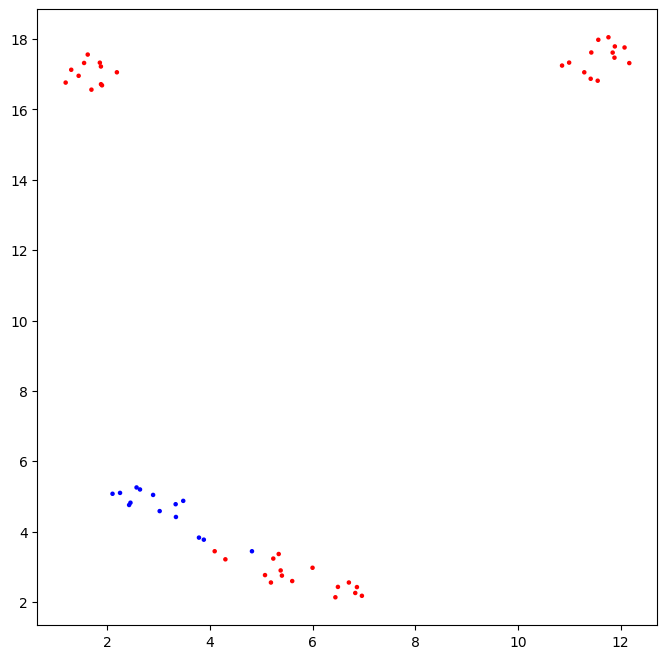

In [23]:
from umap.umap_ import UMAP
import matplotlib.pyplot as plt



distance_matrix = A.get_GW_dmat()

reducer = UMAP(metric = 'precomputed', random_state=1)

embedding = reducer.fit_transform(distance_matrix)
    
        
plt.figure(figsize=(8, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c= ['red' if l == 'GDP' else 'blue' for l in ligand_list], s=5)
# for i in range(52): 
#     plt.annotate(str(i), (embedding[i, 0], embedding[i, 1] + 0.05)) 
  
plt.show()



Next we use pymol to visualize the proteins and the stress levels of different residues in the proteins. 
`A.raw_stress_levels` contains the stresses of all the pairwise calculations, so we first average them for each protein.

In [24]:
avg_stresses_dict =  stress_comparison.normalize_stress_dict( A.raw_stress_dict)
avg_stresses_list = [avg_stresses_dict[name] for name in A.name_list]

In [25]:
pymol_protein_viewer.show_proteins_with_values(
    infiles = [os.path.join(dir, file)  for file in os.listdir(dir)],     chain_ids = [ file[5]  for file in os.listdir(dir)],     data_lists = avg_stresses_list,     output_file = "KRAS ends cut stresses.pse")

The pymol file we generate can then be opened in a pymol GUI window.
![Screenshot](Examples Data/Example 1 Outputs/KRAS stresses screenshot.pdf) 

For clarity we can also view a single protein at a time.



Next we will test how well the stress levels can be used to predict the switch I and switch II regions. These regions do not have well-defined endpoints but we will choose to use residues 30-40 and 60-72 in the canonical indexing respectively. These protein do not contain all the residues so the switch regions are at indices 28-38 and 58-74 instead.

In [27]:

switch_regions_dict = {p.name : [ 1- int(i in range(28,39) or i in range(58,75)) for i in range(161)] for p in protein_list}

avg_precision_dict = stress_comparison.get_AP_scores(avg_stresses_dict, switch_regions_dict)

In [28]:
avg_precision_dict

{'3gft_A': 0.9668889534130874,
 '4dsn_A': 0.9693193838492158,
 '4dso_A': 0.9567030772451607,
 '4dst_A': 0.965842206288982,
 '4epr_A': 0.9668477274775755,
 '4ept_A': 0.9535714634075838,
 '4epv_A': 0.9688440413476281,
 '4epw_A': 0.9702027370407983,
 '4epx_A': 0.9677386400208486,
 '4epy_A': 0.9680468407888427,
 '4ldj_A': 0.9663632626501745,
 '4lpk_B': 0.97106365889409,
 '4obe_A': 0.9635456250756944,
 '4obe_B': 0.96842452956253,
 '4ql3_A': 0.9661178820791774,
 '4tq9_A': 0.9651585387796667,
 '4tq9_B': 0.9658636581018542,
 '4tqa_A': 0.9678516927021218,
 '4tqa_B': 0.9654132992186241,
 '5mla_A': 0.9572070987913182,
 '5mlb_A': 0.9539122446742481,
 '5mlb_C': 0.9542873837953065,
 '5mlb_E': 0.9526750742482961,
 '5mlb_G': 0.9539215162955939,
 '5o2s_A': 0.9539122446742481,
 '5o2s_C': 0.9542873837953065,
 '5o2s_E': 0.9526750742482961,
 '5o2s_G': 0.9539215162955939,
 '5o2t_A': 0.9572070987913182,
 '5ocg_A': 0.9659365209421029,
 '5tar_A': 0.949791507925561,
 '5ufe_A': 0.9486023702647237,
 '5ufq_A': 0.9